<a href="https://colab.research.google.com/github/Chaithanya3116/Credit_card_fraud_detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [ ]:
df = pd.read_csv("creditcard_2023.csv")

print(df.shape)

print("First 5 lines:")
print(df.head(5))

(83874, 31)
First 5 lines:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1     1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2     2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3     3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4     4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

     

In [ ]:
print("describe: ")
print(df.describe())

describe: 
               Time            V1            V2            V3            V4  \
count  83874.000000  83874.000000  83874.000000  83874.000000  83874.000000   
mean   41936.500000      0.314155     -0.504324      1.011831     -0.651989   
std    24212.482576      0.631904      0.719350      0.670124      0.648999   
min        0.000000     -3.495584    -49.966572     -2.631176     -4.468314   
25%    20968.250000     -0.169135     -0.661230      0.567755     -1.008224   
50%    41936.500000      0.090804     -0.421050      0.916040     -0.541211   
75%    62904.750000      0.953410     -0.212168      1.392997     -0.201567   
max    83873.000000      1.695400      3.781692      4.615014      3.175853   

                 V5            V6            V7            V8            V9  \
count  83874.000000  83874.000000  83873.000000  83873.000000  83873.000000   
mean       0.225894      0.489891      0.447552     -0.131397      0.578159   
std        0.643781      0.714065      0

In [ ]:
print("info: ")
print(df.info())

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83874 entries, 0 to 83873
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    83874 non-null  int64  
 1   V1      83874 non-null  float64
 2   V2      83874 non-null  float64
 3   V3      83874 non-null  float64
 4   V4      83874 non-null  float64
 5   V5      83874 non-null  float64
 6   V6      83874 non-null  float64
 7   V7      83873 non-null  float64
 8   V8      83873 non-null  float64
 9   V9      83873 non-null  float64
 10  V10     83873 non-null  float64
 11  V11     83873 non-null  float64
 12  V12     83873 non-null  float64
 13  V13     83873 non-null  float64
 14  V14     83873 non-null  float64
 15  V15     83873 non-null  float64
 16  V16     83873 non-null  float64
 17  V17     83873 non-null  float64
 18  V18     83873 non-null  float64
 19  V19     83873 non-null  float64
 20  V20     83873 non-null  float64
 21  V21     83873 non-null  floa

Class as pie chart:


Text(0, 0.5, '')

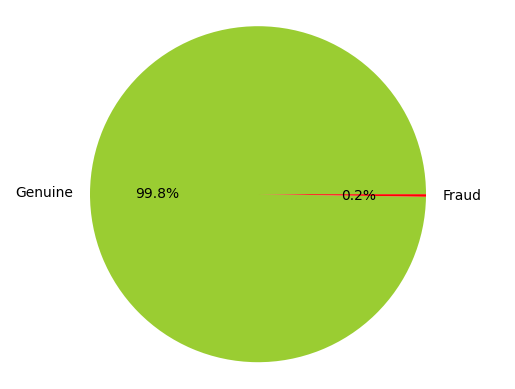

In [ ]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [ ]:
df.isnull().sum().max()

1

In [ ]:
df[df.isnull().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83873,83873,-0.263994,-0.511218,1.078435,0.140036,0.362868,-0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

Time variable
83868    23.296667
83869    23.296944
83870    23.297222
83871    23.297500
83872    23.297778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

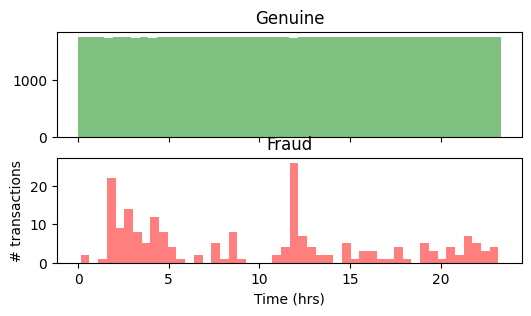

In [ ]:
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [ ]:
df = df.drop(['Time'],axis=1)

Text(0, 0.5, '# transactions')

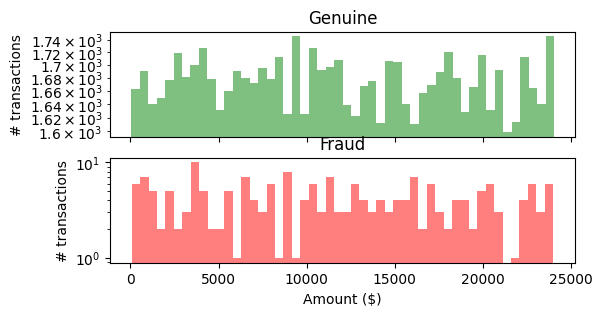

In [ ]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [ ]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

<ipython-input-38-929ad9d749e8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df.Class == 1], bins=50, color='r')
<ipython-input-38-929ad9d749e8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df.Class == 0], bins=50, color='g')
<ipython-input-38-929ad9d749e8>:7: UserWarning

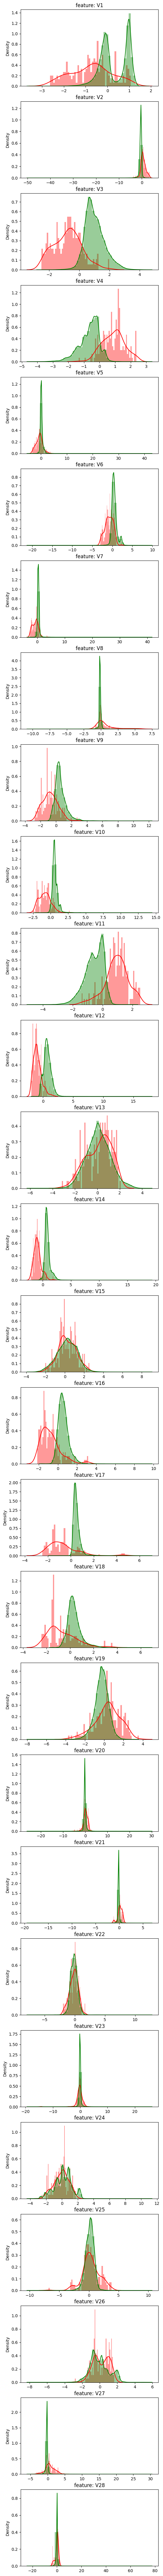

In [ ]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [ ]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)

    from sklearn.model_selection import train_test_split
    y = df['Class'].values
    X = df.drop(['Class'],axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [ ]:
def get_predictions(clf, X_train, y_train, X_test):

    clf = clf

    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)

    y_pred_prob = clf.predict_proba(X_test)

    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred))
    return y_pred, y_pred_prob

In [ ]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred))
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  67098 
test-set size:  16775
fraud cases in test-set:  41.0
train-set confusion matrix:
 [[65840  1096]
 [   22   140]]
test-set confusion matrix:
 [[16479   255]
 [    8    33]]
recall score:  0.8048780487804879
precision score:  0.11458333333333333
f1 score:  0.20060790273556228
accuracy score:  0.9843219076005961
ROC AUC: 0.9881452104230615


In [ ]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  67098 
test-set size:  16775
fraud cases in test-set:  41.0
train-set confusion matrix:
 [[66268   668]
 [   19   143]]
test-set confusion matrix:
 [[16571   163]
 [    7    34]]
recall score:  0.8292682926829268
precision score:  0.17258883248730963
f1 score:  0.2857142857142857
accuracy score:  0.9898658718330849
ROC AUC: 0.9892529303564818


In [ ]:
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  67098 
test-set size:  16775
fraud cases in test-set:  41.0
train-set confusion matrix:
 [[66270   666]
 [   19   143]]
test-set confusion matrix:
 [[16572   162]
 [    7    34]]
recall score:  0.8292682926829268
precision score:  0.17346938775510204
f1 score:  0.2869198312236287
accuracy score:  0.9899254843517139
ROC AUC: 0.9896049229405883


In [ ]:
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  67098 
test-set size:  16775
fraud cases in test-set:  41.0
train-set confusion matrix:
 [[66271   665]
 [   19   143]]
test-set confusion matrix:
 [[16571   163]
 [    7    34]]
recall score:  0.8292682926829268
precision score:  0.17258883248730963
f1 score:  0.2857142857142857
accuracy score:  0.9898658718330849
ROC AUC: 0.9895772299422528


In [ ]:
def predict_instance(model, instance):
  instance = instance.reshape(1, -1)
  predicted_class = model.predict(instance)
  return predicted_class[0]

In [ ]:
features = df.drop(columns=['Class'])
clf = GaussianNB()
clf.fit(X_train, y_train)
user_instance = [-0.522950351,	1.100918679,	-0.975549243,	1.256962226,	0.228431837,	-1.570287888,	-0.317605278,
                 0.295419382,	-1.156934589,	-1.087018604,	1.604735465,	-1.368978634,	-0.135865191,	-1.380780754,	-1.666132107,	-0.441351015,	-0.19481508]
predicted_class = predict_instance(clf, np.array(user_instance))
if predicted_class == 0:
  print("The model predicts that the instance is genuine.")
else:
  print("The model predicts that the instance is fraudulent.")


The model predicts that the instance is fraudulent.
